# NAME: TAIWO MUBARAK OLADAPO
    
DATASET LINK:https://www.kaggle.com/datasets/ealaxi/banksim1

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import itertools
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [2]:
# Loading the csv file

model3 = pd.read_csv("Creditcard.csv")
model3.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [3]:
# removing quotes from each variable

model3['customer'] = model3['customer'].str.strip("'")
model3['age'] = model3['age'].str.strip("'")
model3['gender'] = model3['gender'].str.strip("'")
model3['zipcodeOri'] = model3['zipcodeOri'].str.strip("'")
model3['merchant'] = model3['merchant'].str.strip("'")
model3['zipMerchant'] = model3['zipMerchant'].str.strip("'")
model3['category'] = model3['category'].str.strip("'")

In [4]:
model3['amount'] = model3['amount'].astype(float)
model3['fraud'] = model3['fraud'].astype(float)

In [5]:
model3.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4.55,0.0
1,0,C352968107,2,M,28007,M348934600,28007,es_transportation,39.68,0.0
2,0,C2054744914,4,F,28007,M1823072687,28007,es_transportation,26.89,0.0
3,0,C1760612790,3,M,28007,M348934600,28007,es_transportation,17.25,0.0
4,0,C757503768,5,M,28007,M348934600,28007,es_transportation,35.72,0.0


In [6]:
model3.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [7]:
model3.shape

(594643, 10)

In [8]:
model3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 45.4+ MB


In [9]:
# Checking for null values

model3.isnull().values.any()

False

In [10]:
model3["amount"].describe()

count    594643.000000
mean         37.890135
std         111.402831
min           0.000000
25%          13.740000
50%          26.900000
75%          42.540000
max        8329.960000
Name: amount, dtype: float64

In [11]:
# Checking the number of occurences of each class label

no_fraud = len(model3[model3.fraud == 0])
fraud = len(model3[model3.fraud == 1])
fraud_percentage = (fraud / (fraud + no_fraud)) * 100
print("Number of Genuine transactions: ", no_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percentage))

Number of Genuine transactions:  587443
Number of Fraud transactions:  7200
Percentage of Fraud transactions: 1.2108


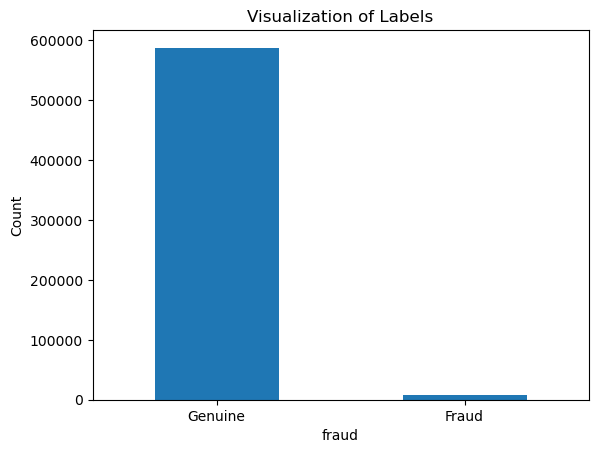

In [12]:
# Visualizing the label columns

labels = ["Genuine", "Fraud"]
count_classes = model3.value_counts(model3['fraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

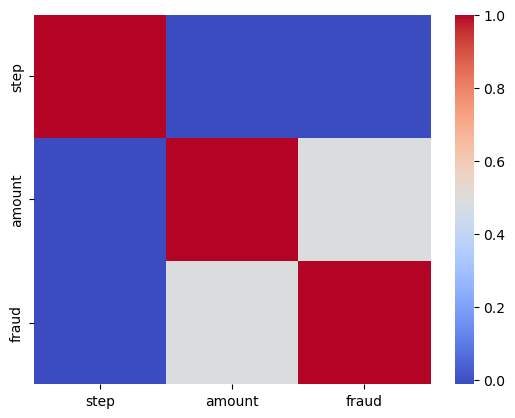

In [13]:
# calculate correlation matrix
correlation_matrix = model3.corr()

# plot correlation matrix
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

In [14]:
# to transform all the column which contains the object or string 
col_categorical = model3.select_dtypes(include= ['object']).columns
for col in col_categorical:
    model3[col] = model3[col].astype('category')
model3[col_categorical] = model3[col_categorical].apply(lambda x: x.cat.codes)
model3.head(5)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,210,4,2,0,30,0,12,4.55,0.0
1,0,2753,2,2,0,30,0,12,39.68,0.0
2,0,2285,4,1,0,18,0,12,26.89,0.0
3,0,1650,3,2,0,30,0,12,17.25,0.0
4,0,3585,5,2,0,30,0,12,35.72,0.0


In [15]:
scaler = StandardScaler()
model3["NormalizedzipcodeOri"] = scaler.fit_transform(model3["zipcodeOri"].values.reshape(-1, 1))
model3.drop(["zipcodeOri", "zipMerchant"], inplace= True, axis= 1)
Y = model3["fraud"]
X = model3.drop(["fraud"], axis= 1)

In [16]:
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)
print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (416250, 8)
Shape of test_X:  (178393, 8)


In [17]:
# Decision Tree
decision_tree = DecisionTreeClassifier()

# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)

# Logistic Regression
logistic_regression = LogisticRegression()

# Naive Bayes
naive_bayes = GaussianNB()

# SVM
support_vector_machine = SVC()

In [18]:
# Decision Tree
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100

In [19]:
# Random Forest
random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100

In [20]:
# Logistic Regression
logistic_regression.fit(train_X, train_Y)
predictions_lr = logistic_regression.predict(test_X)
logistic_regression_score = logistic_regression.score(test_X, test_Y) * 100

/Users/macbookpro2019/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# Naive Bayes
naive_bayes.fit(train_X, train_Y)
predictions_nb = naive_bayes.predict(test_X)
naive_bayes_score = naive_bayes.score(test_X, test_Y) * 100

In [22]:
# SVM
support_vector_machine.fit(train_X, train_Y)
predictions_svm = support_vector_machine.predict(test_X)
support_vector_machine_score = support_vector_machine.score(test_X, test_Y) * 100

In [23]:
print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)
print("Logistic Regression Score: ", logistic_regression_score)
print("Naive Bayes Score: ", naive_bayes_score)
print("SVM Score: ", support_vector_machine_score)

Random Forest Score:  99.61545576339878
Decision Tree Score:  99.40076124063164
Logistic Regression Score:  99.33293346712034
Naive Bayes Score:  98.4965777805183
SVM Score:  99.36152203281519


In [24]:
# The below function is directly taken from the scikit-learn website to plot the confusion matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [25]:
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[175709    568]
 [   501   1615]]


Confusion matrix, without normalization


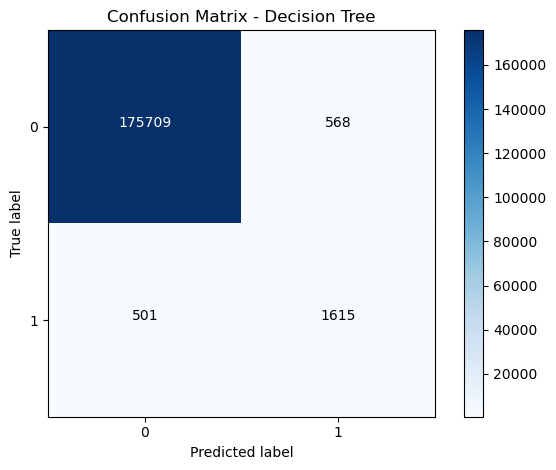

In [26]:
plot_confusion_matrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - Decision Tree")

In [27]:
# The function below prints the following necessary metrics
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [28]:
print("Evaluation of Decision Tree Model")
print()
metrics(test_Y, predictions_dt.round())

Evaluation of Decision Tree Model

Accuracy: 0.99401
Precision: 0.73981
Recall: 0.76323
F1-score: 0.75134


In [29]:
confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[176114    163]
 [   523   1593]]


Confusion matrix, without normalization


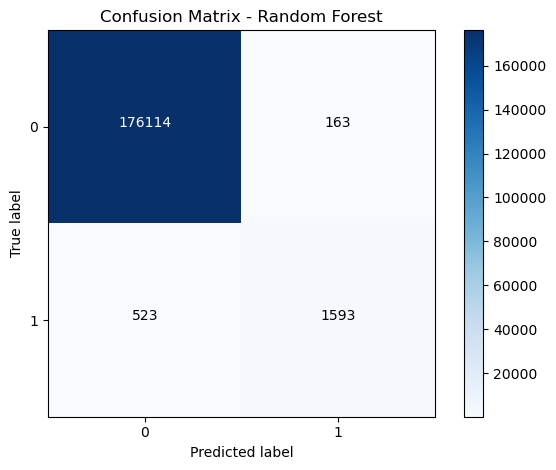

In [30]:
plot_confusion_matrix(confusion_matrix_rf, classes=[0, 1], title= "Confusion Matrix - Random Forest")

In [31]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.99615
Precision: 0.90718
Recall: 0.75284
F1-score: 0.82283


In [32]:
confusion_matrix_lr = confusion_matrix(test_Y, predictions_lr.round())
print("Confusion Matrix - Logistic Regression")
print(confusion_matrix_lr)

Confusion Matrix - Logistic Regression
[[176040    237]
 [   953   1163]]


Confusion matrix, without normalization


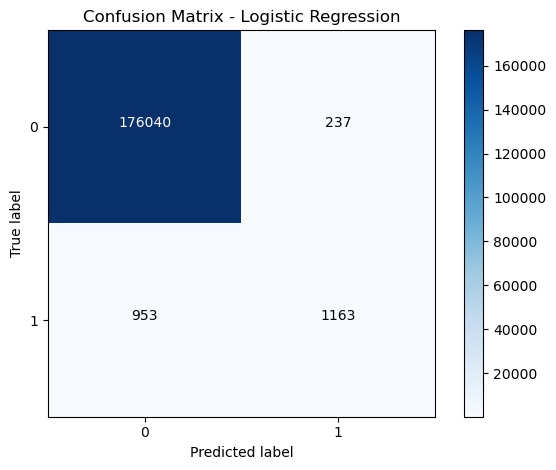

In [33]:
plot_confusion_matrix(confusion_matrix_lr, classes=[0, 1], title= "Confusion Matrix - Logistic Regression")

In [34]:
print("Evaluation of Logistic Regression Model")
print()
metrics(test_Y, predictions_lr.round())

Evaluation of Logistic Regression Model

Accuracy: 0.99333
Precision: 0.83071
Recall: 0.54962
F1-score: 0.66155


In [35]:
confusion_matrix_nb = confusion_matrix(test_Y, predictions_nb.round())
print("Confusion Matrix - Naive Bayes")
print(confusion_matrix_nb)

Confusion Matrix - Naive Bayes
[[174049   2228]
 [   454   1662]]


Confusion matrix, without normalization


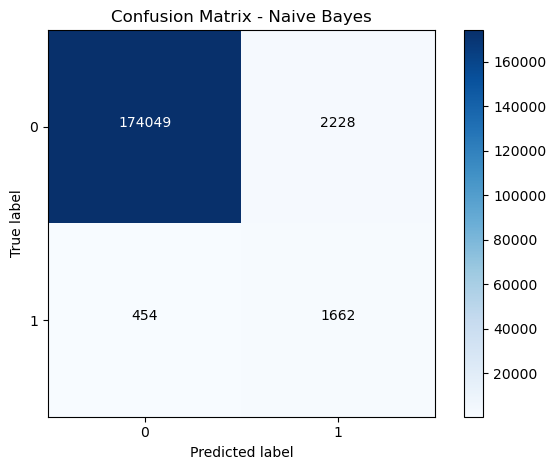

In [36]:
plot_confusion_matrix(confusion_matrix_nb, classes=[0, 1], title= "Confusion Matrix - Naive Bayes")

In [37]:
print("Evaluation of Naive Bayes Model")
print()
metrics(test_Y, predictions_nb.round())

Evaluation of Naive Bayes Model

Accuracy: 0.98497
Precision: 0.42725
Recall: 0.78544
F1-score: 0.55345


In [38]:
confusion_matrix_svm = confusion_matrix(test_Y, predictions_svm.round())
print("Confusion Matrix - Support Vector Machine")
print(confusion_matrix_svm)

Confusion Matrix - Support Vector Machine
[[176219     58]
 [  1081   1035]]


Confusion matrix, without normalization


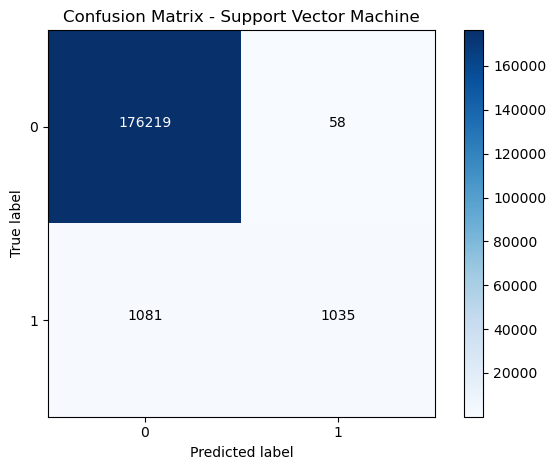

In [39]:
plot_confusion_matrix(confusion_matrix_svm, classes=[0, 1], title= "Confusion Matrix - Support Vector Machine")

In [40]:
print("Evaluation of Support Vector Machine Model")
print()
metrics(test_Y, predictions_svm.round())

Evaluation of Support Vector Machine Model

Accuracy: 0.99362
Precision: 0.94694
Recall: 0.48913
F1-score: 0.64506
